In [1]:
# Library imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

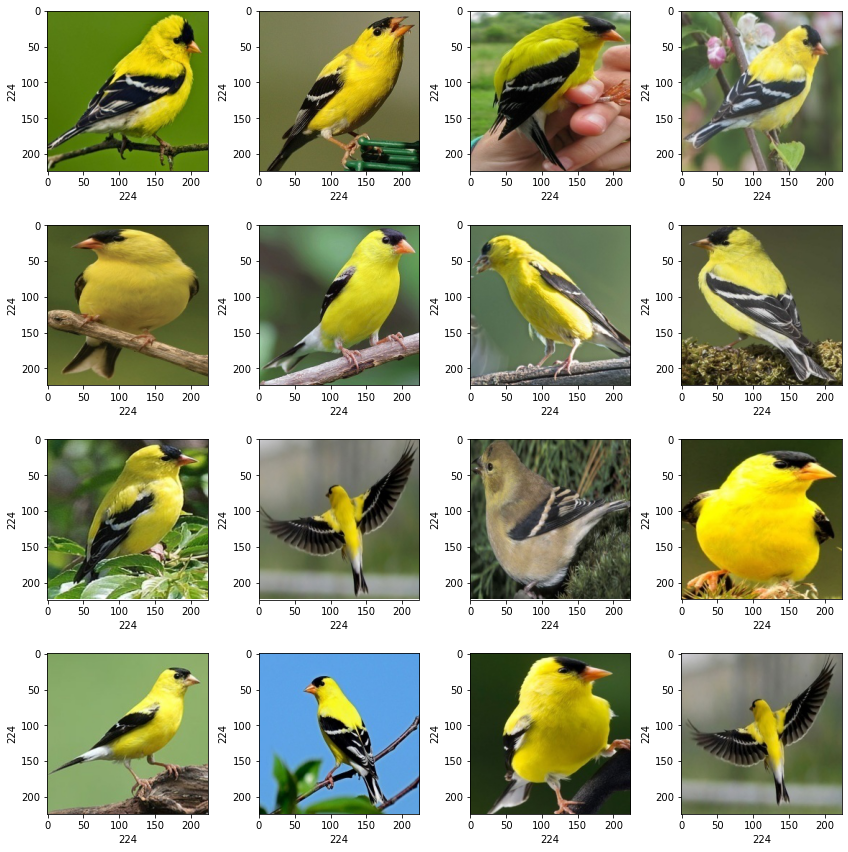

In [2]:
# Plotting 12 images to check dataset

plt.figure(figsize=(12,12))
path = "Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [3]:
# Setting path and creating empty list

dir = "Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [4]:
# Reading and converting image to numpy array

for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [5]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [6]:
# Storing number of classes

num_classes = len(label_counts)
num_classes

6

In [7]:
# Checking input image shape

image_list[0].shape

(224, 224, 3)

In [8]:
# Checking labels shape

label_list = np.array(label_list)
label_list.shape

(811,)

In [9]:
# Splitting dataset

x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [10]:
# Normalize and reshape data

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 224,224,3)
x_test = x_test.reshape( -1, 224,224,3)

In [11]:
# Label binarizing

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [12]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [13]:
# Building model architecture
model = Sequential()
model.add(Conv2D(8, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(32, activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 32)       0

In [16]:
# Compiling model

from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [17]:
# Training the model

epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 7s 907ms/step - loss: 1.7888 - accuracy: 0.1931 - val_loss: 1.7544 - val_accuracy: 0.2846
Epoch 2/50
5/5 [==============================] - 4s 754ms/step - loss: 1.7372 - accuracy: 0.2645 - val_loss: 1.6984 - val_accuracy: 0.3077
Epoch 3/50
5/5 [==============================] - 4s 759ms/step - loss: 1.6576 - accuracy: 0.3417 - val_loss: 1.6524 - val_accuracy: 0.3615
Epoch 4/50
5/5 [==============================] - 4s 759ms/step - loss: 1.5606 - accuracy: 0.4556 - val_loss: 1.5827 - val_accuracy: 0.4538
Epoch 5/50
5/5 [==============================] - 4s 733ms/step - loss: 1.4574 - accuracy: 0.5521 - val_loss: 1.4277 - val_accuracy: 0.4615
Epoch 6/50
5/5 [==============================] - 4s 718ms/step - loss: 1.2959 - accuracy: 0.5714 - val_loss: 1.2860 - val_accuracy: 0.5692
Epoch 7/50
5/5 [==============================] - 4s 737ms/step - loss: 1.1820 - accuracy: 0.6255 - val_loss: 1.2513 - val_accuracy: 0.5231
Epoch 8/50
5/5 [====

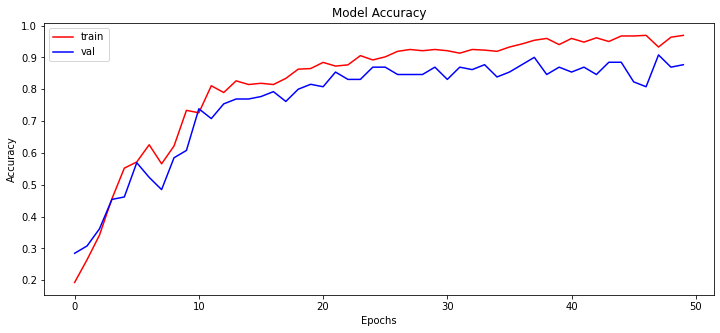

In [18]:
#Plot the training history

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

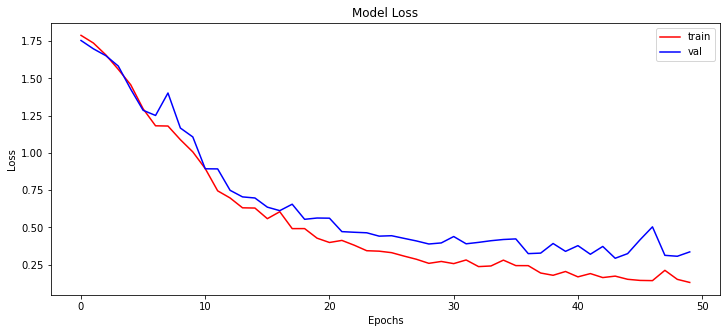

In [19]:
#Plot the loss history

plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [20]:
# Calculating test accuracy

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 0s 53ms/step - loss: 0.3827 - accuracy: 0.8896
Test Accuracy: 88.95705342292786


In [21]:
# Storing predictions

y_pred = model.predict(x_test)

In [22]:
# Saving model

model.save("bird_species.h5")

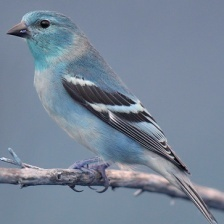

In [23]:
# Plotting image to compare

img = array_to_img(x_test[5])
img

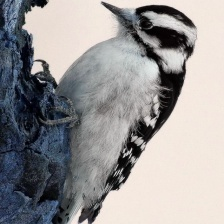

In [25]:
img = array_to_img(x_test[10])
img

In [26]:
# Finding max value from predition list and comaparing original value vs predicted

labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH


In [27]:
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[10])])
print("Predicted : ",labels[np.argmax(y_pred[10])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  DOWNY WOODPECKER
Predicted :  DOWNY WOODPECKER


### scope

This project can be used for educational purposes to get a better understanding of how to create network architecture for a CNN model. It can be used by bird sanctuaries to identify different types of birds.